This notebook has been used to produce plots for my article on Sequential Trade Model for Asymmetrical Information [(find it here)](https://medium.com/@lu.battistoni/sequential-trade-model-for-asymmetrical-information-54245268f802)

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# compute ask, bid and spread according to the model described in the article
def compute_ask(V_low, V_high, delta, mu):
    if mu == 1 and delta == 1:
        return V_high
    else:
        num = V_low * (1 - mu) * delta + V_high * (1 - delta) * (1 + mu)
        den = 1 + mu * (1 - 2*delta)

    return num / den

def compute_bid(V_low, V_high, delta, mu):
    if mu == 1 and delta == 0:
        return V_low
    else:
        num = V_low * (1 + mu) * delta + V_high * (1 - delta) * (1 - mu)
        den = 1 - mu * (1 - 2*delta)

    return num / den

def compute_bid_ask_spread(V_low, V_high, delta, mu):
    return compute_ask(V_low, V_high, delta, mu) - compute_bid(V_low, V_high, delta, mu)

In [4]:
V = 100 # starting value of the stock
deltaV = V / 100 # stock increment

V_low = V - deltaV # low realisation of stock value
V_high = V + deltaV # high realisation of stock value

# we now want to understand how the bid ask surface changes with mu and delta
# for each mu and delta compute...
A = [] # ask prices
B = [] # bid prices
mu = [] # fractions of informed traders
delta = [] # probability of having a low realisation

for m in range(0, 101, 1):
    for d in range(1, 101, 1):
        mu.append(m/100)
        delta.append(d/100)
        A.append(compute_ask(V_low=V_low, V_high=V_high, delta=d/100, mu=m/100))
        B.append(compute_bid(V_low=V_low, V_high=V_high, delta=d/100, mu=m/100))


df = pd.DataFrame({
    'mu': mu, 'delta': delta,
    'Ask': A, 'Bid': B
})
df['Bid-Ask'] = df['Ask'] - df['Bid']
df['Mid'] = (df['Ask'] + df['Bid']) / 2

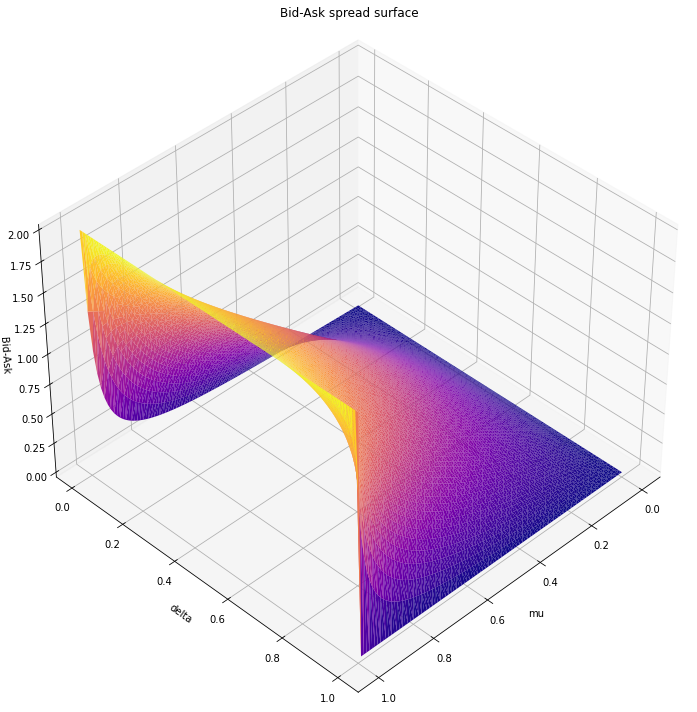

In [5]:
# Surface plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(df['mu'], df['delta'], df['Bid-Ask'], cmap='plasma')

# Set labels and title
ax.set_xlabel('mu')
ax.set_ylabel('delta')
ax.set_zlabel('Bid-Ask')
ax.set_title('Bid-Ask spread surface')

ax.view_init(elev=40, azim=45)

plt.tight_layout()

plt.show()


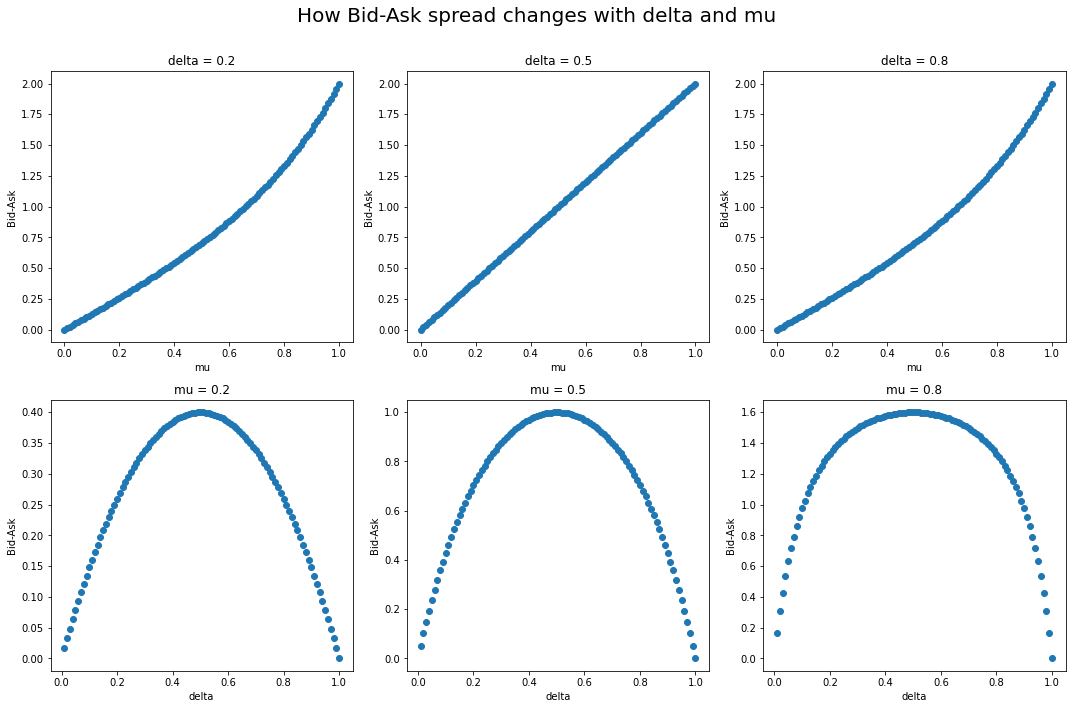

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()


df_copy = df.loc[df['delta'] == 0.2].copy()

ax = axs[0]
ax.scatter(df_copy['mu'], df_copy['Bid-Ask'])
ax.set_xlabel('mu')
ax.set_ylabel('Bid-Ask')
ax.set_title('delta = 0.2')


df_copy = df.loc[df['delta'] == 0.5].copy()

ax = axs[1]
ax.scatter(df_copy['mu'], df_copy['Bid-Ask'])
ax.set_xlabel('mu')
ax.set_ylabel('Bid-Ask')
ax.set_title('delta = 0.5')

df_copy = df.loc[df['delta'] == 0.8].copy()

ax = axs[2]
ax.scatter(df_copy['mu'], df_copy['Bid-Ask'])
ax.set_xlabel('mu')
ax.set_ylabel('Bid-Ask')
ax.set_title('delta = 0.8')


df_copy = df.loc[df['mu'] == 0.2].copy()

ax = axs[3]
ax.scatter(df_copy['delta'], df_copy['Bid-Ask'])
ax.set_xlabel('delta')
ax.set_ylabel('Bid-Ask')
ax.set_title('mu = 0.2')


df_copy = df.loc[df['mu'] == 0.5].copy()

ax = axs[4]
ax.scatter(df_copy['delta'], df_copy['Bid-Ask'])
ax.set_xlabel('delta')
ax.set_ylabel('Bid-Ask')
ax.set_title('mu = 0.5')


df_copy = df.loc[df['mu'] == 0.8].copy()

ax = axs[5]
ax.scatter(df_copy['delta'], df_copy['Bid-Ask'])
ax.set_xlabel('delta')
ax.set_ylabel('Bid-Ask')
ax.set_title('mu = 0.8')

fig.suptitle('How Bid-Ask spread changes with delta and mu\n', fontsize=20)

plt.tight_layout()

plt.show()

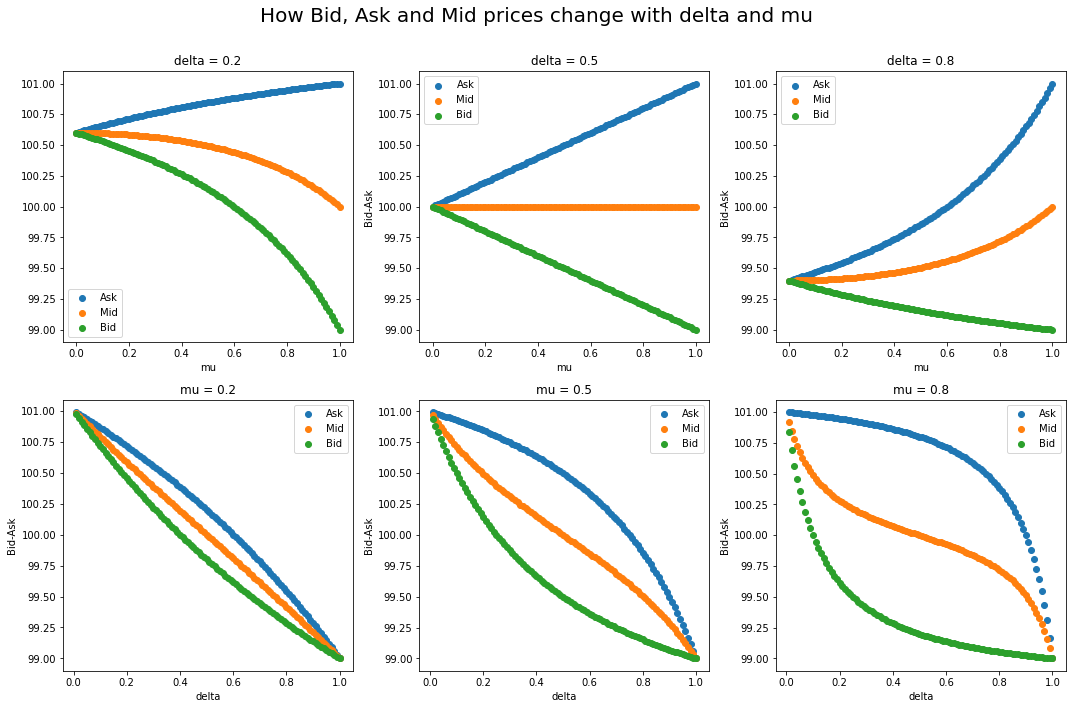

In [7]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()


df_copy = df.loc[df['delta'] == 0.2].copy()

ax = axs[0]
ax.scatter(df_copy['mu'], df_copy['Ask'], label='Ask')
ax.scatter(df_copy['mu'], df_copy['Mid'], label='Mid')
ax.scatter(df_copy['mu'], df_copy['Bid'], label='Bid')

ax.set_xlabel('mu')
ax.set_title('delta = 0.2')
ax.legend()

df_copy = df.loc[df['delta'] == 0.5].copy()

ax = axs[1]
ax.scatter(df_copy['mu'], df_copy['Ask'], label='Ask')
ax.scatter(df_copy['mu'], df_copy['Mid'], label='Mid')
ax.scatter(df_copy['mu'], df_copy['Bid'], label='Bid')

ax.set_xlabel('mu')
ax.set_ylabel('Bid-Ask')
ax.set_title('delta = 0.5')
ax.legend()


df_copy = df.loc[df['delta'] == 0.8].copy()

ax = axs[2]
ax.scatter(df_copy['mu'], df_copy['Ask'], label='Ask')
ax.scatter(df_copy['mu'], df_copy['Mid'], label='Mid')
ax.scatter(df_copy['mu'], df_copy['Bid'], label='Bid')

ax.set_xlabel('mu')
ax.set_ylabel('Bid-Ask')
ax.set_title('delta = 0.8')
ax.legend()


df_copy = df.loc[df['mu'] == 0.2].copy()

ax = axs[3]
ax.scatter(df_copy['delta'], df_copy['Ask'], label='Ask')
ax.scatter(df_copy['delta'], df_copy['Mid'], label='Mid')
ax.scatter(df_copy['delta'], df_copy['Bid'], label='Bid')

ax.set_xlabel('delta')
ax.set_ylabel('Bid-Ask')
ax.set_title('mu = 0.2')
ax.legend()


df_copy = df.loc[df['mu'] == 0.5].copy()

ax = axs[4]
ax.scatter(df_copy['delta'], df_copy['Ask'], label='Ask')
ax.scatter(df_copy['delta'], df_copy['Mid'], label='Mid')
ax.scatter(df_copy['delta'], df_copy['Bid'], label='Bid')

ax.set_xlabel('delta')
ax.set_ylabel('Bid-Ask')
ax.set_title('mu = 0.5')
ax.legend()


df_copy = df.loc[df['mu'] == 0.8].copy()

ax = axs[5]
ax.scatter(df_copy['delta'], df_copy['Ask'], label='Ask')
ax.scatter(df_copy['delta'], df_copy['Mid'], label='Mid')
ax.scatter(df_copy['delta'], df_copy['Bid'], label='Bid')

ax.set_xlabel('delta')
ax.set_ylabel('Bid-Ask')
ax.set_title('mu = 0.8')
ax.legend()

fig.suptitle('How Bid, Ask and Mid prices change with delta and mu\n', fontsize=20)

# Adjust layout
plt.tight_layout()


# Show plot
plt.show()



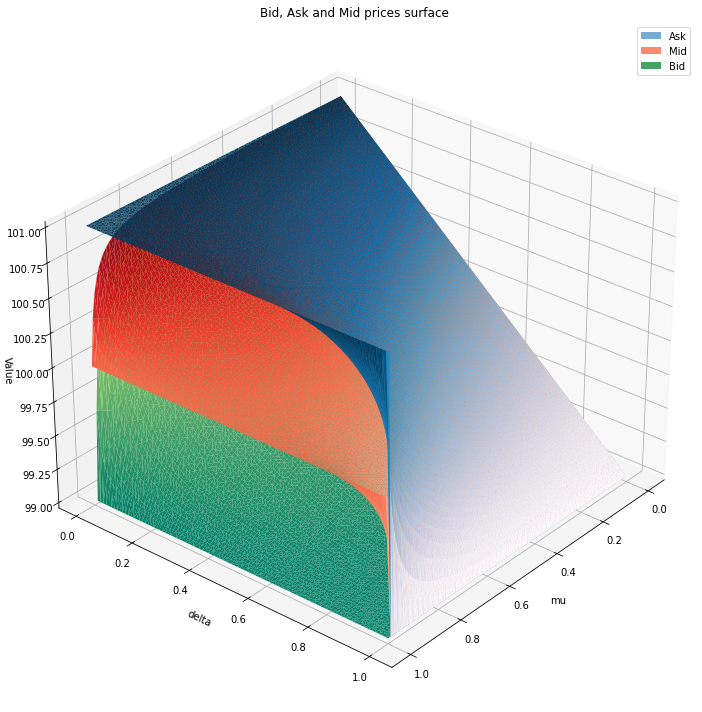

In [8]:
# Surface plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(df['mu'], df['delta'], df['Ask'], cmap='PuBu')
proxy1 = plt.Rectangle((0, 0), 1, 1, fc=surf.get_facecolor()[5000], edgecolor='none')

surf = ax.plot_trisurf(df['mu'], df['delta'], df['Mid'], cmap='Reds')
proxy2 = plt.Rectangle((0, 0), 1, 1, fc=surf.get_facecolor()[8000], edgecolor='none')

surf = ax.plot_trisurf(df['mu'], df['delta'], df['Bid'], cmap='summer')
proxy3 = plt.Rectangle((0, 0), 1, 1, fc=surf.get_facecolor()[8000], edgecolor='none')

ax.legend([proxy1, proxy2, proxy3], ['Ask', 'Mid', 'Bid'])

# Set labels and title
ax.set_xlabel('mu')
ax.set_ylabel('delta')
ax.set_zlabel('Value')
ax.set_title('Bid, Ask and Mid prices surface')

ax.view_init(elev=30, azim=40)

plt.tight_layout()

plt.show()
